# Stock Price Forecasting - Data Preprocessing

We will utilize historical stock data of `Apple Inc. (AAPL)` spanning the period from `January 1, 2012`, to `December 31, 2024`. The dataset serves as the foundation for developing and evaluating various predictive models aimed at forecasting future stock prices. Prior to modeling, comprehensive data preprocessing is performed to ensure data quality, consistency, and suitability for analysis.

---

**Task**
- Import libraries
- Load and prepare data
- Standardize dataset
- Understanding dataset
- Analytical Plots
    - Closing price
    - Volume of sales
    - Moving Average of the stock
    - Daily return of the stock on average
    - Persist Dataset

---

**Selected Models:**
- ARIMA (Statistical Model)
- XGBoost (ML Model)
- LSTM (Deep Learning Model)

# Imports Libraries & Configuration

In [1]:
# suppress minor warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# core python libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Load and Prepare Data

In [2]:
# The stock we'll use for this analysis
stock = 'AAPL'

# data range for stock data
start = '2012-01-01'
end = '2024-12-31'

# Download stock data using yfinance
data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
# display data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.345174,12.383300,12.278229,12.290238,302220800
2012-01-04,12.411514,12.448740,12.286631,12.308245,260022000
2012-01-05,12.549308,12.564918,12.388400,12.456846,271269600
2012-01-06,12.680492,12.690999,12.585029,12.601540,318292800
2012-01-09,12.660381,12.841103,12.648973,12.773558,394024400


In [4]:
# shape of the dataset
data.shape

(3269, 5)

## Standardize Dataset

In [5]:
# reset index to make Date a column
data.reset_index(inplace=True)

In [6]:
# flatten the column names (remove multi-level, unnecessary tags)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [''.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

In [7]:
data.columns

Index(['Date', 'CloseAAPL', 'HighAAPL', 'LowAAPL', 'OpenAAPL', 'VolumeAAPL'], dtype='object')

In [8]:
# rename columns to clean names
data.rename(columns={
    'CloseAAPL': 'Close',
    'HighAAPL': 'High',
    'LowAAPL': 'Low',
    'OpenAAPL': 'Open',
    'VolumeAAPL': 'Volume'
}, inplace=True)

In [9]:
data.head()

,Date,Close,High,Low,Open,Volume
0,2012-01-03,12.345174,12.383300,12.278229,12.290238,302220800
1,2012-01-04,12.411514,12.448740,12.286631,12.308245,260022000
2,2012-01-05,12.549308,12.564918,12.388400,12.456846,271269600
3,2012-01-06,12.680492,12.690999,12.585029,12.601540,318292800
4,2012-01-09,12.660381,12.841103,12.648973,12.773558,394024400


In [10]:
# fix date columns if there is any inconsistent or unusual dates
data['Date'] = pd.to_datetime(data['Date'], format='mixed')

## Understand the dataset

In [11]:
# descriptive statistics about the Data
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3269,2018-07-01 23:14:37.699602432,2012-01-03 00:00:00,2015-04-06 00:00:00,2018-07-02 00:00:00,2021-09-29 00:00:00,2024-12-30 00:00:00,NaN
Close,3269.0,76.24217,11.896804,23.223894,41.571018,139.147614,258.103729,65.849788
High,3269.0,76.981344,12.173106,23.351528,41.837845,140.838071,259.179926,66.457533
Low,3269.0,75.423667,11.731388,23.031585,41.176434,136.593802,256.718662,65.147895
Open,3269.0,76.176454,11.818818,23.199499,41.550751,139.08446,257.276679,65.767061
Volume,3269.0,181275898.348119,23234700.0,79592600.0,121517600.0,216229200.0,1506120000.0,166798882.858728


In [12]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3269 non-null   datetime64[ns]
 1   Close   3269 non-null   float64       
 2   High    3269 non-null   float64       
 3   Low     3269 non-null   float64       
 4   Open    3269 non-null   float64       
 5   Volume  3269 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 153.4 KB


# Analytical Plots

## Closing Price

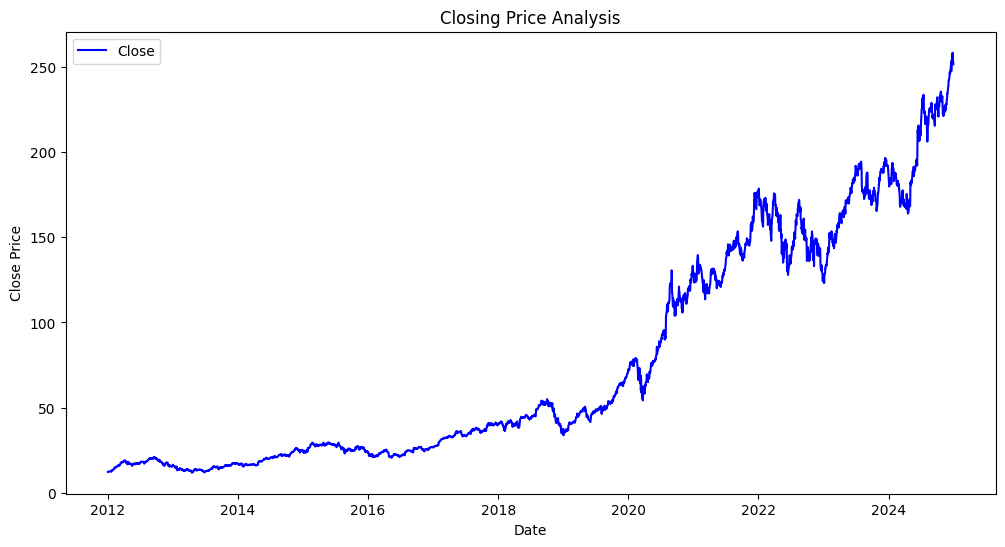

In [13]:
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(data['Date'], data['Close'], label='Close', color='blue')
plt.title(f"Closing Price Analysis")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

## Volume of Sales

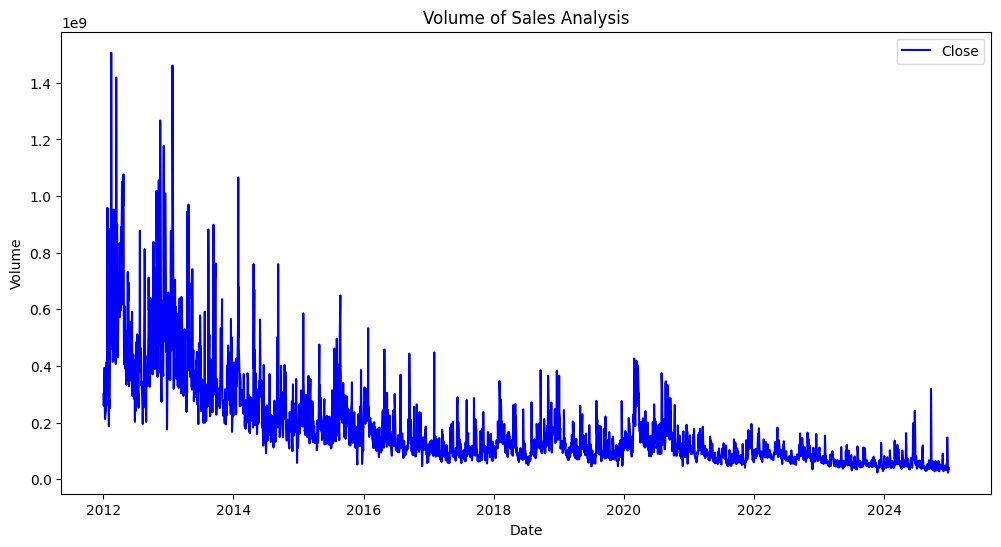

In [14]:
plt.figure(figsize=(12, 6))

# Plot the closing price
plt.plot(data['Date'], data['Volume'], label='Close', color='blue')
plt.title(f"Volume of Sales Analysis")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Moving Average of the Stock

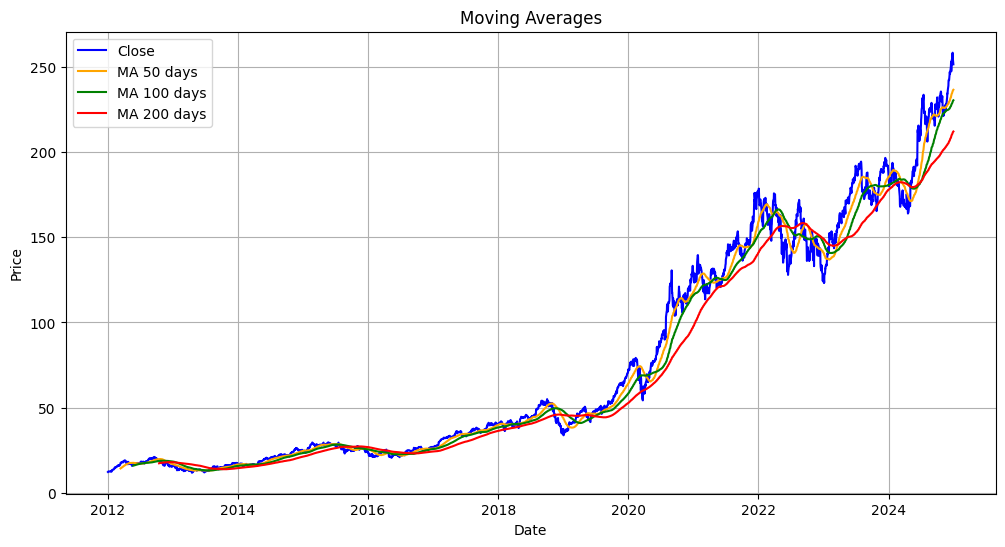

In [15]:
# define moving averages
ma_days = [50, 100, 200]
ma_colors = ['orange', 'green', 'red']

# calculate moving averages
for ma in ma_days:
    column_name = f"MA_{ma}"
    data[column_name] = data['Close'].rolling(ma).mean()

# plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close', color='blue')

# plot each moving average
for ma, color in zip(ma_days, ma_colors):
    plt.plot(data['Date'], data[f"MA_{ma}"], label=f"MA {ma} days", color=color)

plt.title(f"Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Daily return of the stock on average

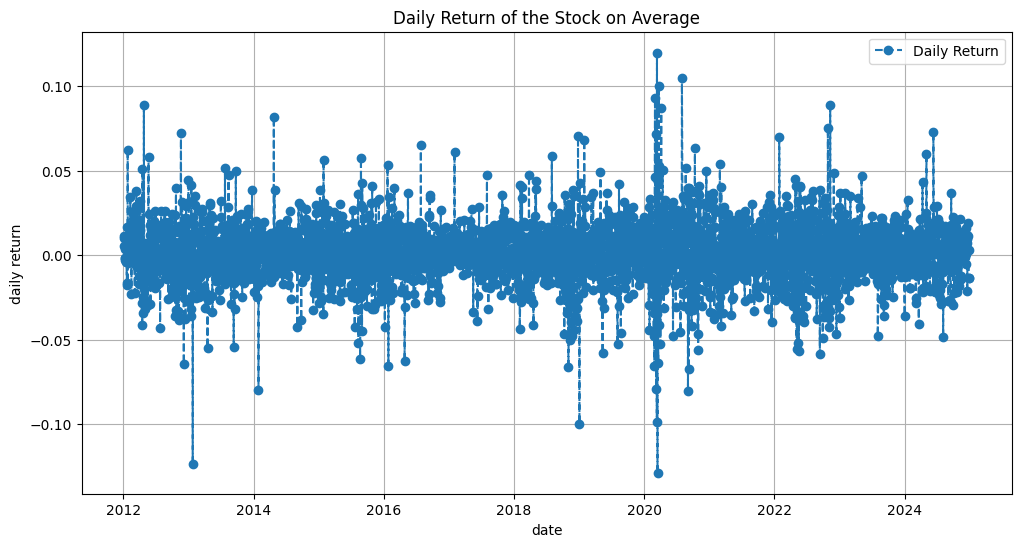

In [16]:
# calculate daily return
data['DailyReturn'] = data['Close'].pct_change()

# plot daily return percentage
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['DailyReturn'], linestyle='--', marker='o', label='Daily Return')

plt.title(f"Daily Return of the Stock on Average")
plt.xlabel("date")
plt.ylabel("daily return")
plt.legend()
plt.grid(True)
plt.show()


## Persist dataset

In [17]:
output_dir = file = Path(r"../data")
output_dir.mkdir(parents=True, exist_ok=True)           # create folder if it doesn't exist

# define file path
file_path = output_dir / f"{stock}_preprocessed.csv"

# save dataframe to csv
data.to_csv(file_path, index=False)